In [3]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("SegPath-YOLO.pt")

# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolov8n.onnx'

# Load the exported ONNX model/
onnx_model = YOLO("SegPath-YOLO.onnx")


Ultralytics YOLOv8.0.238 🚀 Python-3.8.18 torch-2.1.2+cu121 CPU (Intel Xeon Gold 6354 3.00GHz)
PathNuclei summary (fused): 230 layers, 3391219 parameters, 0 gradients, 12.1 GFLOPs

PyTorch: starting from 'SegPath-YOLO.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 43, 8400), (1, 32, 160, 160)) (7.2 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 0.7s, saved as 'SegPath-YOLO.onnx' (13.2 MB)

Export complete (1.1s)
Results saved to /endosome/archive/DPDS/Xiao_lab/shared/jia_yao/SegPath-YOLO
Predict:         yolo predict task=segment model=SegPath-YOLO.onnx imgsz=640  
Validate:        yolo val task=segment model=SegPath-YOLO.onnx imgsz=640 data=./datasets/data_lung/data.yaml  
Visualize:       https://netron.app
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [5]:
from ultralytics import YOLO
onnx_model = YOLO("SegPath-YOLO.onnx", task='segment')
# Run inference on a test image
results = onnx_model("example.png")

Loading SegPath-YOLO.onnx for ONNX Runtime inference...

image 1/1 /endosome/archive/DPDS/Xiao_lab/shared/jia_yao/SegPath-YOLO/example.png: 640x640 15 bloods, 153 immunes, 69 stromals, 36 tumors, 58.0ms
Speed: 2.2ms preprocess, 58.0ms inference, 54.4ms postprocess per image at shape (1, 3, 640, 640)


Loading SegPath-YOLO.onnx for ONNX Runtime inference...

0: 640x640 40 bloods, 95 immunes, 53 stromals, 10 tumors, 58.4ms
Speed: 3.3ms preprocess, 58.4ms inference, 41.9ms postprocess per image at shape (1, 3, 640, 640)


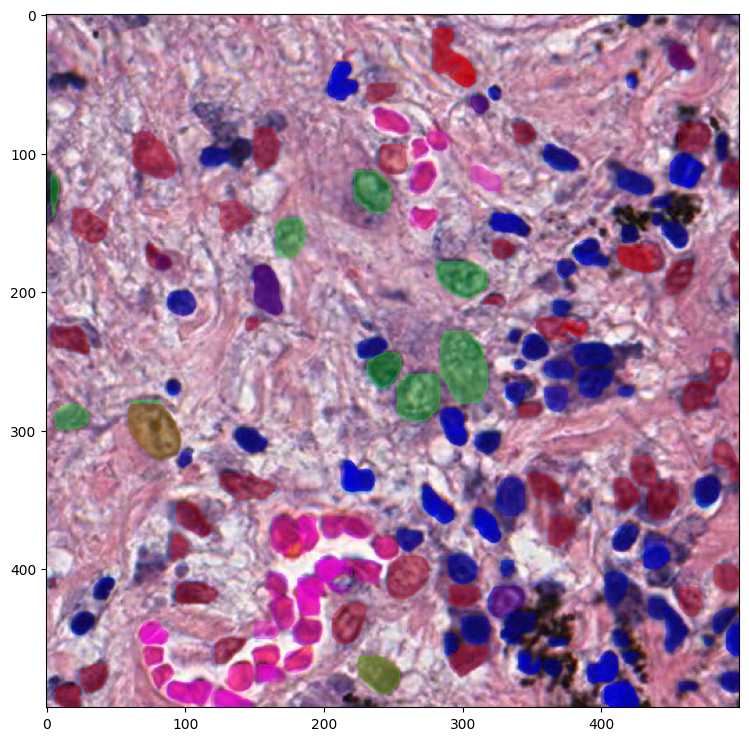

In [24]:
import os
import skimage.io
import numpy as np
import matplotlib.pyplot as plt

from ultralytics import YOLO
from utils_image import overlay_detections

def read_annotations(filename):
    boxes, labels, masks = [], [], []
    with open(filename, 'r') as f:
        for line in f.read().splitlines():
            tmp = [float(x) for x in line.split(' ')]
            label = int(tmp[0])
            mask = np.array(tmp[1:]).reshape(-1, 2)
            (x0, y0), (x1, y1) = mask.min(0), mask.max(0)
            labels.append(label)
            masks.append([mask])
            boxes.append([x0, y0, x1, y1])
    print(len(labels))
    return np.array(boxes), np.array(labels), masks



labels_color = {
    -100: '#949494',
    0: '#ffffff',
    1: '#ff00ff',
    2: '#0094e1',
    3: '#0000ff',
    4: '#ffff00',
    5: '#646464',
    6: '#ff0000',
    7: '#00ff00',
}
labels_text = {
    -100: 'unlabeled',
    1: 'blood',
    2: 'dead',
    3: 'immune',
    4: 'macrophage',
    5: 'others',
    6: 'stromal',
    7: 'tumor',
}


# Perform object detection on an image using the model
model = YOLO("SegPath-YOLO.onnx", task='segment')

image_path = '5.jpg'
image = skimage.io.imread(image_path)

h, w = image.shape[0], image.shape[1]

fig, axes = plt.subplots(1, 1, figsize=(18, 9))
    
r = model([image_path])[0].cpu()
boxes, labels, scores = r.boxes.xyxy, r.boxes.cls, r.boxes.conf
masks = [[x] for x in r.masks.xy]
axes.imshow(image)
overlay_detections(
    axes, bboxes=boxes, labels=labels+1, masks=masks, scores=scores,
    labels_color=labels_color, labels_text=labels_text, 
    show_bboxes=False, show_texts=False, show_scores=False,
    )
   
plt.show()

#print(boxes)
#print(labels)
#print(scores)
#print(r.names)